In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15, 7]
from PIL import Image
import requests
from io import BytesIO

In [5]:
df=pd.read_csv('Fifa 23 Players Data.csv')

In [6]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [8]:
df.isna().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [20]:
df=df.drop_duplicates()

In [9]:
len(set(df['Club Name']))

679

In [10]:
len(set(df['National Team Name']))

36

Text(0.5, 1.0, 'Nationality vs Player count')

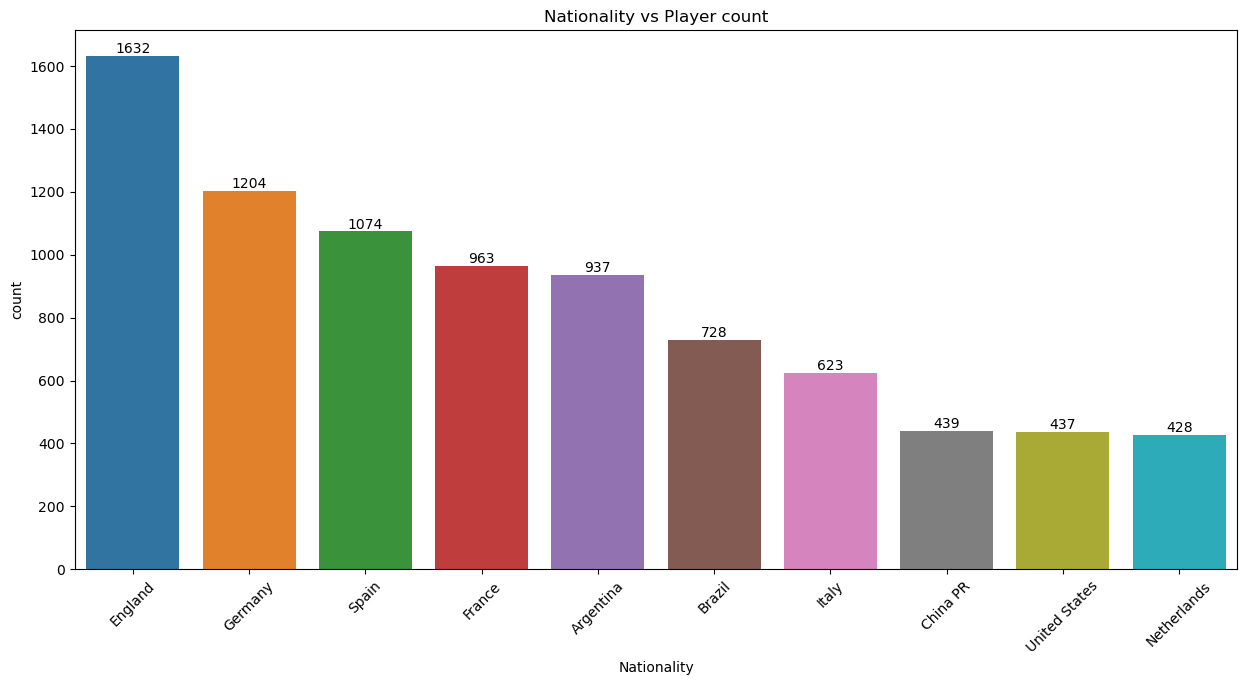

In [11]:
df2=df.groupby('Nationality')['Full Name'].count().reset_index(name='count').sort_values('count',ascending=False).head(10)
ax=sns.barplot(x=df2['Nationality'],y=df2['count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title('Nationality vs Player count')

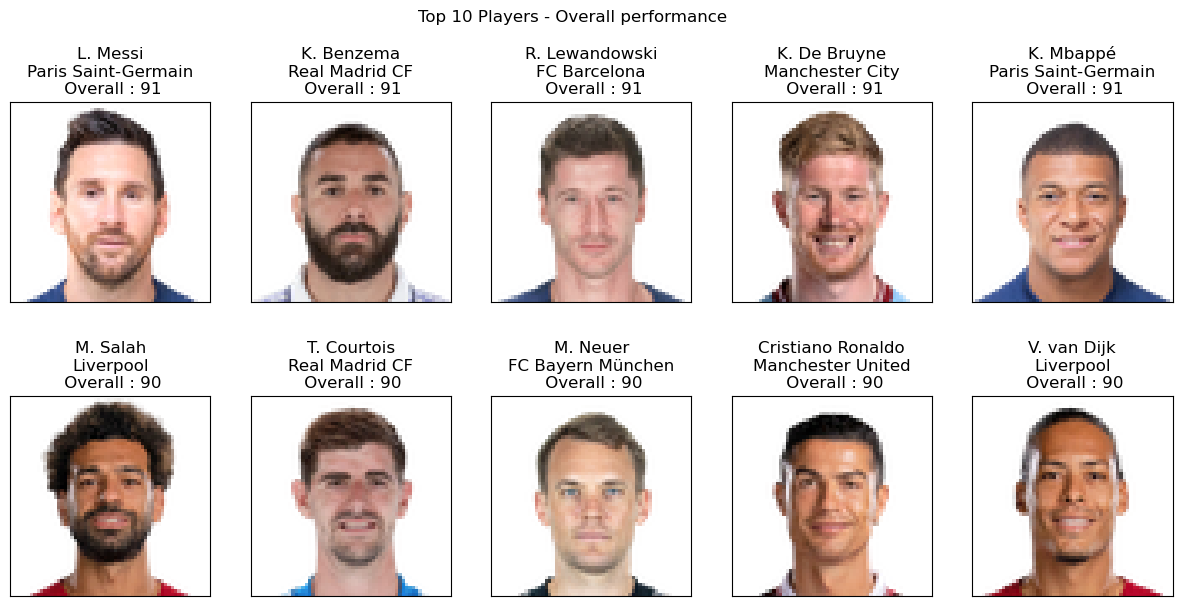

In [12]:
df2=df.sort_values(by='Overall', ascending=False)[['Known As','Image Link','Club Name','Overall']].head(10)
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Overall performance')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Overall : '+str(df2.loc[k,'Overall']))

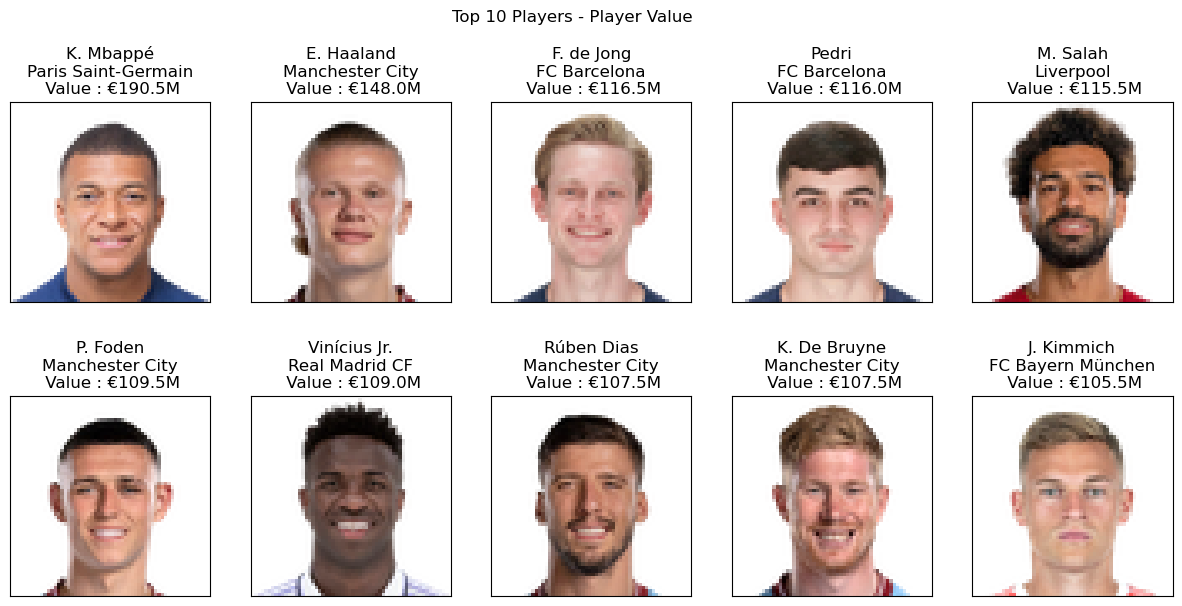

In [13]:
df2=df.sort_values(by='Value(in Euro)',ascending=False)[['Known As','Image Link','Club Name','Value(in Euro)']].head(10)
df2['Value(in Euro)']=df2['Value(in Euro)'].apply(lambda x : "€{:.1f}M".format((x/1000000)))
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Player Value')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Value : '+str(df2.loc[k,'Value(in Euro)']))

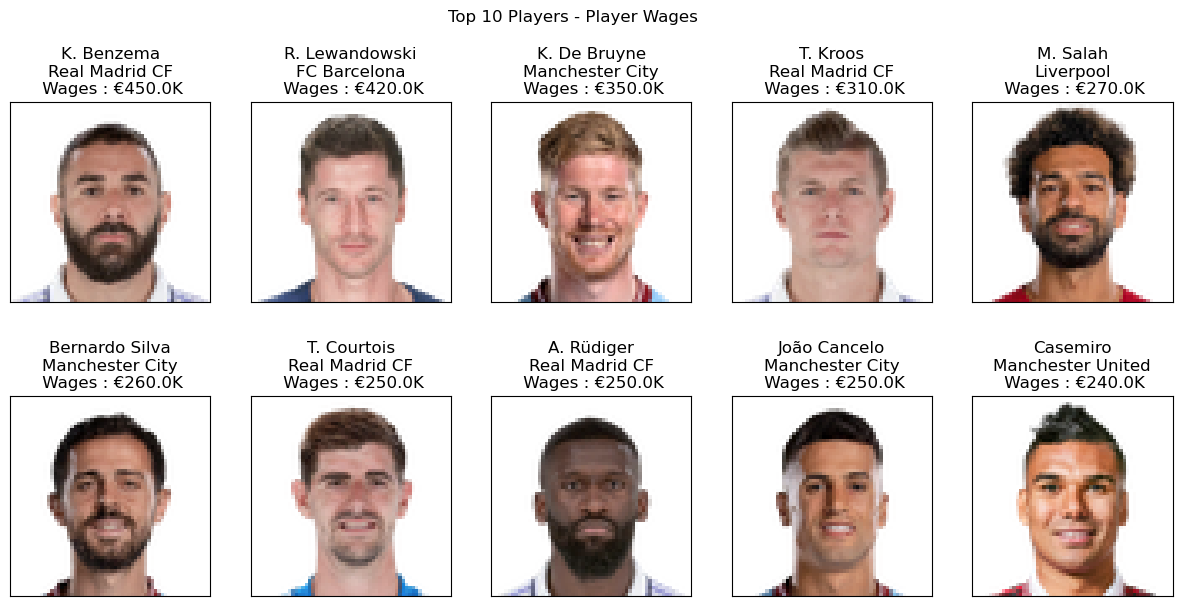

In [14]:
df2=df.sort_values(by='Wage(in Euro)',ascending=False)[['Known As','Image Link','Club Name','Wage(in Euro)']].head(10)
df2['Wage(in Euro)']=df2['Wage(in Euro)'].apply(lambda x : "€{:.1f}K".format((x/1000)))
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Player Wages')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Wages : '+str(df2.loc[k,'Wage(in Euro)']))

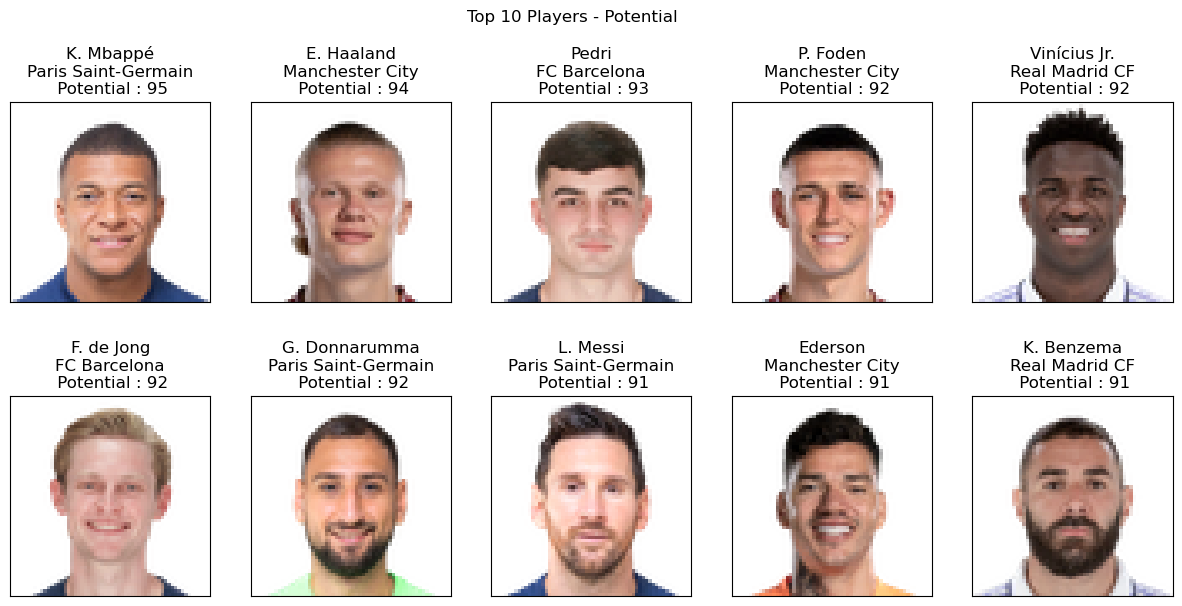

In [15]:
df2=df.sort_values(by='Potential',ascending=False)[['Known As','Image Link','Club Name','Potential']].head(10)
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Potential')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Potential : '+str(df2.loc[k,'Potential']))

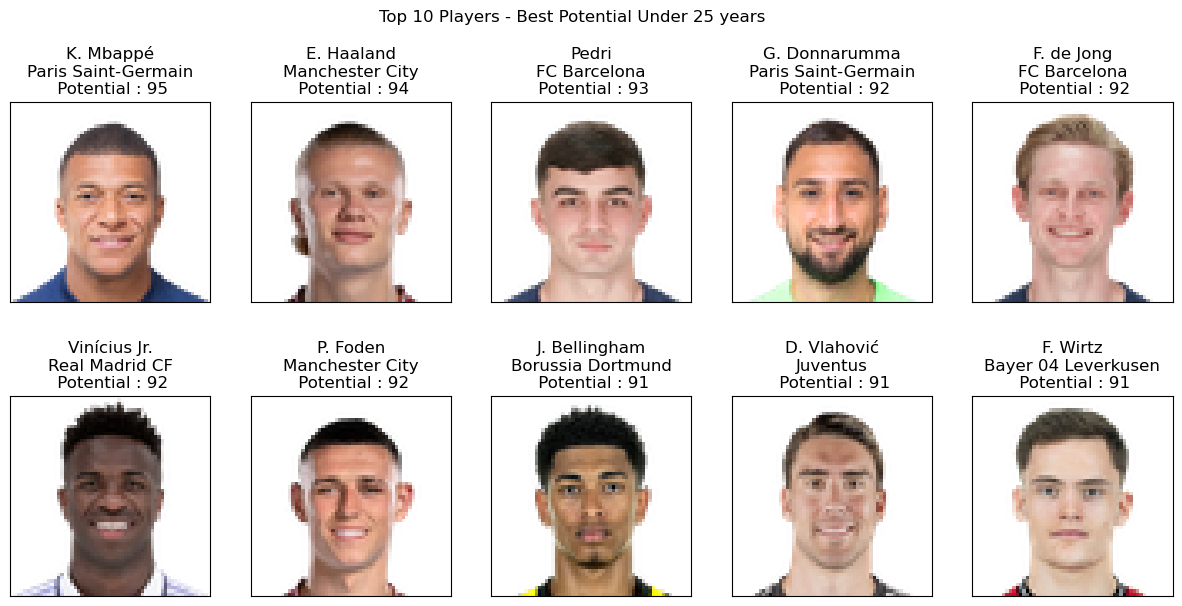

In [16]:
df2=df[df['Age']<=25].sort_values(by='Potential',ascending=False)[['Known As','Image Link','Club Name','Potential']].head(10)
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Best Potential Under 25 years')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Potential : '+str(df2.loc[k,'Potential']))

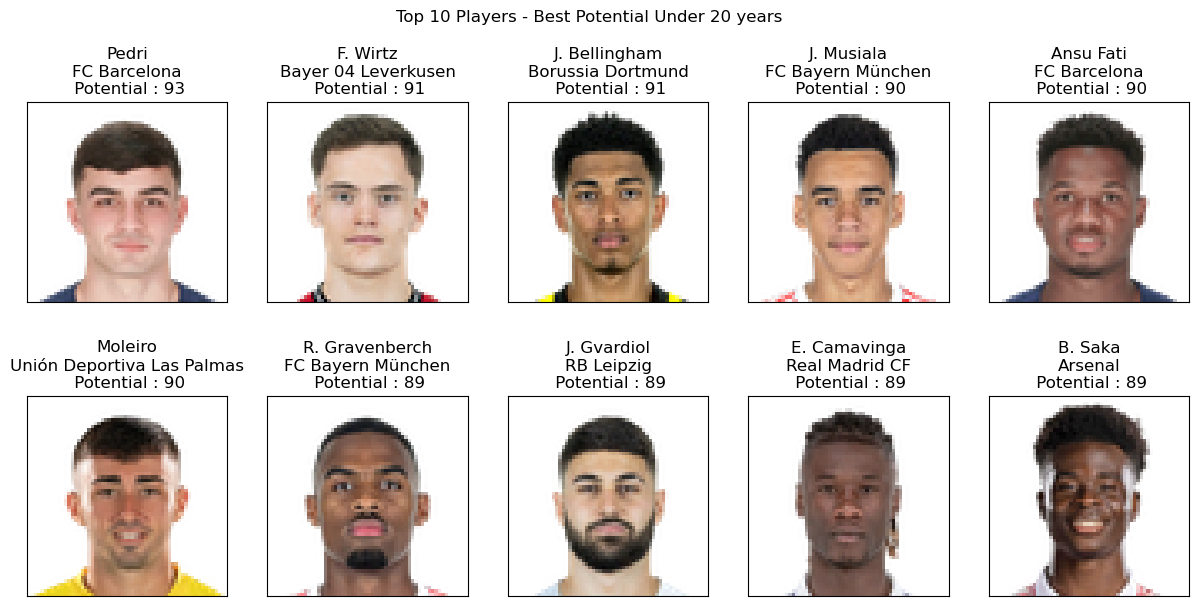

In [23]:
df2=df[df['Age']<=20].sort_values(by='Potential',ascending=False)[['Known As','Image Link','Club Name','Potential']].head(10)
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Best Potential Under 20 years')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Potential : '+str(df2.loc[k,'Potential']))

You have choosen the Top 10 player for the stats -ST Rating


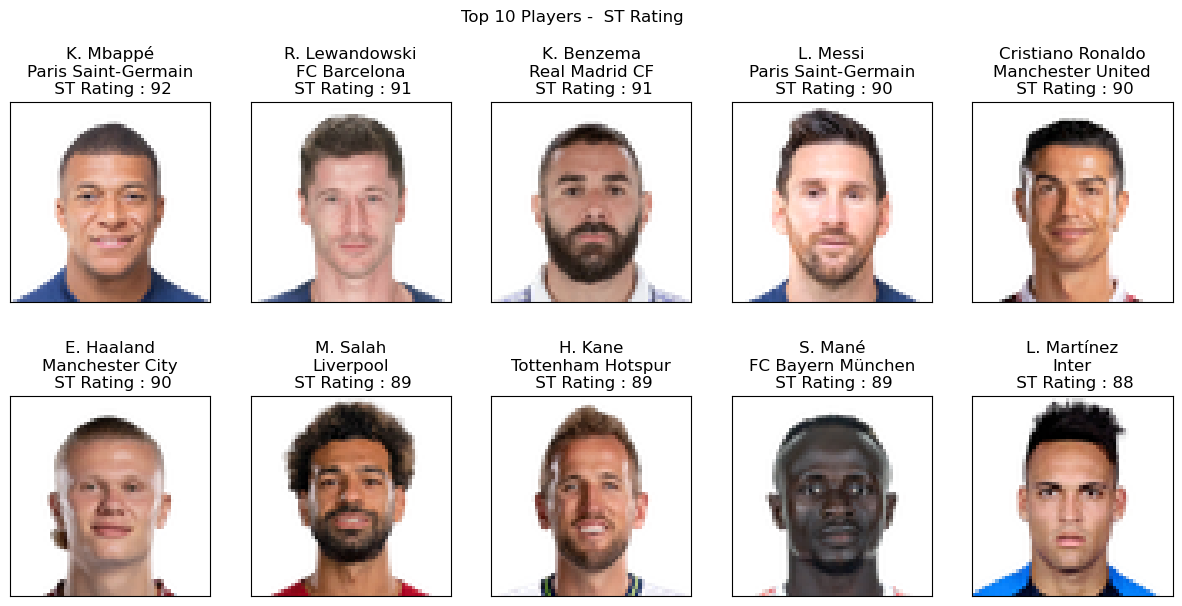

In [33]:
ColumnName=input('Please Enter the Column Name for which you want to see the top players. Ensure the Column Name Matches the Column in the dataframe')
if ColumnName not in df.columns:
    print('This data doesnt exist in the dataframe. Please ensure you pass in the right information')
else:
    print('You have choosen the Top 10 player for the stats -{0}'.format(ColumnName))
    df2=df.sort_values(by=ColumnName,ascending=False)[['Known As','Image Link','Club Name',ColumnName]].head(10)
    df2=df2.reset_index()
    fig,ax=plt.subplots(2,5)
    fig.suptitle('Top 10 Players -  {0}'.format(ColumnName))
    k=-1
    for i in range(2):
        for j in range(5):
            k+=1
            response = requests.get(df2.loc[k,'Image Link'])
            img = Image.open(BytesIO(response.content)) 
            ax[i,j].imshow(img)
            ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
            ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n {0} : '.format(ColumnName)+str(df2.loc[k,ColumnName]))

In [53]:
df2= df.groupby('Club Name')['Overall'].mean().reset_index(name='Avg Player Rating').sort_values('Avg Player Rating',ascending=False).head(10)
df2['Avg Player Rating']=df2['Avg Player Rating'].apply(lambda x:np.around(x))
df2

,Club Name,Avg Player Rating
232,FC Bayern München,81.0
454,Paris Saint-Germain,80.0
346,Inter,80.0
389,Liverpool,79.0
400,Manchester City,79.0
18,AFC Richmond,78.0
648,Villarreal CF,78.0
476,RB Leipzig,78.0
355,Juventus,77.0
11,AC Milan,77.0


In [54]:
df2= df.groupby('Club Name')['Overall'].median().reset_index(name='Avg Player Rating').sort_values('Avg Player Rating',ascending=False).head(10)
df2['Avg Player Rating']=df2['Avg Player Rating'].apply(lambda x:np.around(x))
df2

,Club Name,Avg Player Rating
232,FC Bayern München,83.0
400,Manchester City,83.0
346,Inter,82.0
389,Liverpool,81.0
134,Chelsea,81.0
495,Real Madrid CF,81.0
454,Paris Saint-Germain,80.0
401,Manchester United,80.0
69,Atlético de Madrid,80.0
476,RB Leipzig,80.0


In [93]:
df2=df[['Club Name','Known As','Overall']]
df2['Rank']=df2.groupby(['Club Name'])['Overall'].rank(method='first',ascending=False)
df3=df2[df2['Rank']<=15].groupby('Club Name')['Overall'].mean().reset_index(name='AvgPlayerRating').sort_values(by='AvgPlayerRating', ascending=False).head(15)
df3['AvgPlayerRating']=df3['AvgPlayerRating'].apply(lambda x : np.around(x))
df3

/var/folders/cr/mp3dxz553qz3dyt1hzdy1m2r0000gn/T/ipykernel_14816/2259144707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank']=df2.groupby(['Club Name'])['Overall'].rank(method='first',ascending=False)


,Club Name,AvgPlayerRating
400,Manchester City,86.0
495,Real Madrid CF,85.0
454,Paris Saint-Germain,85.0
389,Liverpool,85.0
232,FC Bayern München,85.0
230,FC Barcelona,85.0
134,Chelsea,85.0
346,Inter,84.0
69,Atlético de Madrid,83.0
401,Manchester United,83.0


In [94]:
df2=df[['Club Name','Known As','Overall']]
df2['Rank']=df2.groupby(['Club Name'])['Overall'].rank(method='first',ascending=False)
df3=df2[df2['Rank']<=15].groupby('Club Name')['Overall'].median().reset_index(name='MedianPlayerRating').sort_values(by='MedianPlayerRating', ascending=False).head(15)
df3['MedianPlayerRating']=df3['MedianPlayerRating'].apply(lambda x : np.around(x))
df3

/var/folders/cr/mp3dxz553qz3dyt1hzdy1m2r0000gn/T/ipykernel_14816/2822151133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank']=df2.groupby(['Club Name'])['Overall'].rank(method='first',ascending=False)


,Club Name,MedianPlayerRating
400,Manchester City,86.0
389,Liverpool,85.0
232,FC Bayern München,85.0
346,Inter,84.0
134,Chelsea,84.0
454,Paris Saint-Germain,84.0
495,Real Madrid CF,84.0
230,FC Barcelona,84.0
69,Atlético de Madrid,83.0
355,Juventus,83.0


/var/folders/cr/mp3dxz553qz3dyt1hzdy1m2r0000gn/T/ipykernel_14816/3052153678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank']=df2.groupby(['Best Position'])['Overall'].rank(method='first',ascending=False)


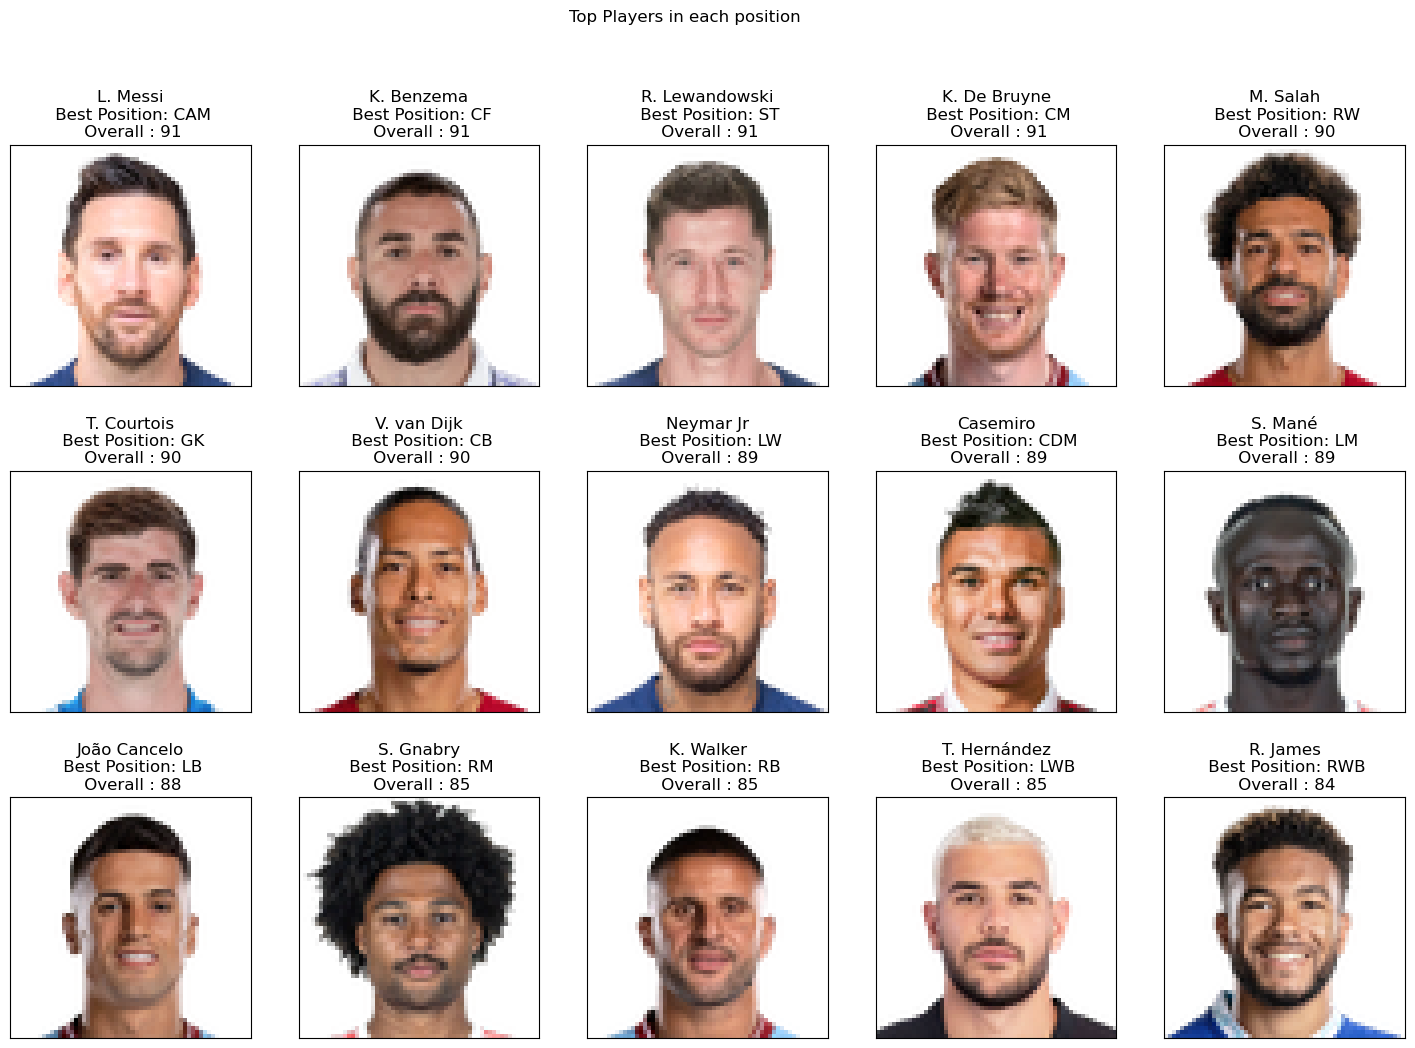

In [113]:
plt.rcParams["figure.figsize"] = [18,12]
df2=df[['Best Position','Known As','Overall','Image Link']]
df2['Rank']=df2.groupby(['Best Position'])['Overall'].rank(method='first',ascending=False)
df3=df2[df2['Rank']<=1].reset_index()
fig,ax=plt.subplots(3,5)
fig.suptitle('Top Players in each position')
k=-1
for i in range(3):
    for j in range(5):
        k+=1
        response = requests.get(df3.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df3.loc[k,'Known As']+'\n Best Position: '+df3.loc[k,'Best Position']+'\n Overall : '+str(df3.loc[k,'Overall']))
